# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [11]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install pip --upgrade
!pip install smdebug
!pip install sagemaker


     |████████████████████████████████| 1.7 MB 23.8 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1
    Uninstalling pip-21.1:
      Successfully uninstalled pip-21.1
distutils: /opt/conda/include/python3.6m/UNKNOWN
sysconfig: /opt/conda/include/python3.6m
user = False
home = None
root = None
prefix = None


In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import boto3
import sagemaker
import json
import zipfile
import cv2

import pandas as pd
import numpy as np

## Dataset
*TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.*

The dataset is composed of dog images from different breeds. The images can be found in 3 different folders: train, test, and valid, which are further subdivided by 133 dog breeds. The 133 subfolders dictate the number of classes for this classification model. Each of these subfolders contain samples of varying dogs of the same breed shot at different angles and perspectives.

## Image Dimension

The images have varying dimensions as shows below:

In [13]:
import cv2

# Read the image file
image1 = cv2.imread("dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08351.jpg")
image2 = cv2.imread("dogImages/train/115.Papillon/Papillon_07499.jpg")
image3 = cv2.imread("dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07375.jpg")


# Read the height and width of the image
height, width, shape = image.shape
print("Height, width, and shape of image 1", image1.shape)
print("Height, width, and shape of image 2", image2.shape)
print("Height, width, and shape of image 3", image3.shape)

Height, width, and shape of image 1 (426, 636, 3)
Height, width, and shape of image 2 (624, 600, 3)
Height, width, and shape of image 3 (579, 640, 3)


## Class Distribution
The list and graph below shows an uneven distribution of dog images for each class.

In [24]:
import os

root_dir = 'dogImages/train'
extensions = ['.jpg', '.jpeg', '.png', '.bmp'] # list of image extensions to consider

for dirpath, dirnames, filenames in os.walk(root_dir):
    class_count = 0
    for filename in filenames:
        if any(filename.endswith(ext) for ext in extensions):
            class_count += 1
    if class_count > 0:
        print(f'{os.path.basename(dirpath)}: {class_count}')

114.Otterhound: 35
110.Norwegian_lundehund: 33
127.Silky_terrier: 41
091.Japanese_chin: 57
095.Kuvasz: 49
061.English_cocker_spaniel: 61
043.Canaan_dog: 50
131.Wirehaired_pointing_griffon: 30
124.Poodle: 50
087.Irish_terrier: 66
053.Cocker_spaniel: 47
064.English_toy_spaniel: 39
105.Neapolitan_mastiff: 31
032.Boston_terrier: 65
017.Bearded_collie: 62
094.Komondor: 44
003.Airedale_terrier: 52
084.Icelandic_sheepdog: 50
122.Pointer: 32
098.Leonberger: 46
125.Portuguese_water_dog: 34
009.American_water_spaniel: 34
058.Dandie_dinmont_terrier: 50
115.Papillon: 63
.ipynb_checkpoints: 1
006.American_eskimo_dog: 64
041.Bullmastiff: 69
085.Irish_red_and_white_setter: 37
081.Greyhound: 56
004.Akita: 63
103.Mastiff: 58
044.Cane_corso: 64
118.Pembroke_welsh_corgi: 53
013.Australian_terrier: 46
117.Pekingese: 48
002.Afghan_hound: 58
025.Black_and_tan_coonhound: 37
129.Tibetan_mastiff: 48
093.Kerry_blue_terrier: 35
023.Bernese_mountain_dog: 65
070.German_pinscher: 47
052.Clumber_spaniel: 49
048.Chih

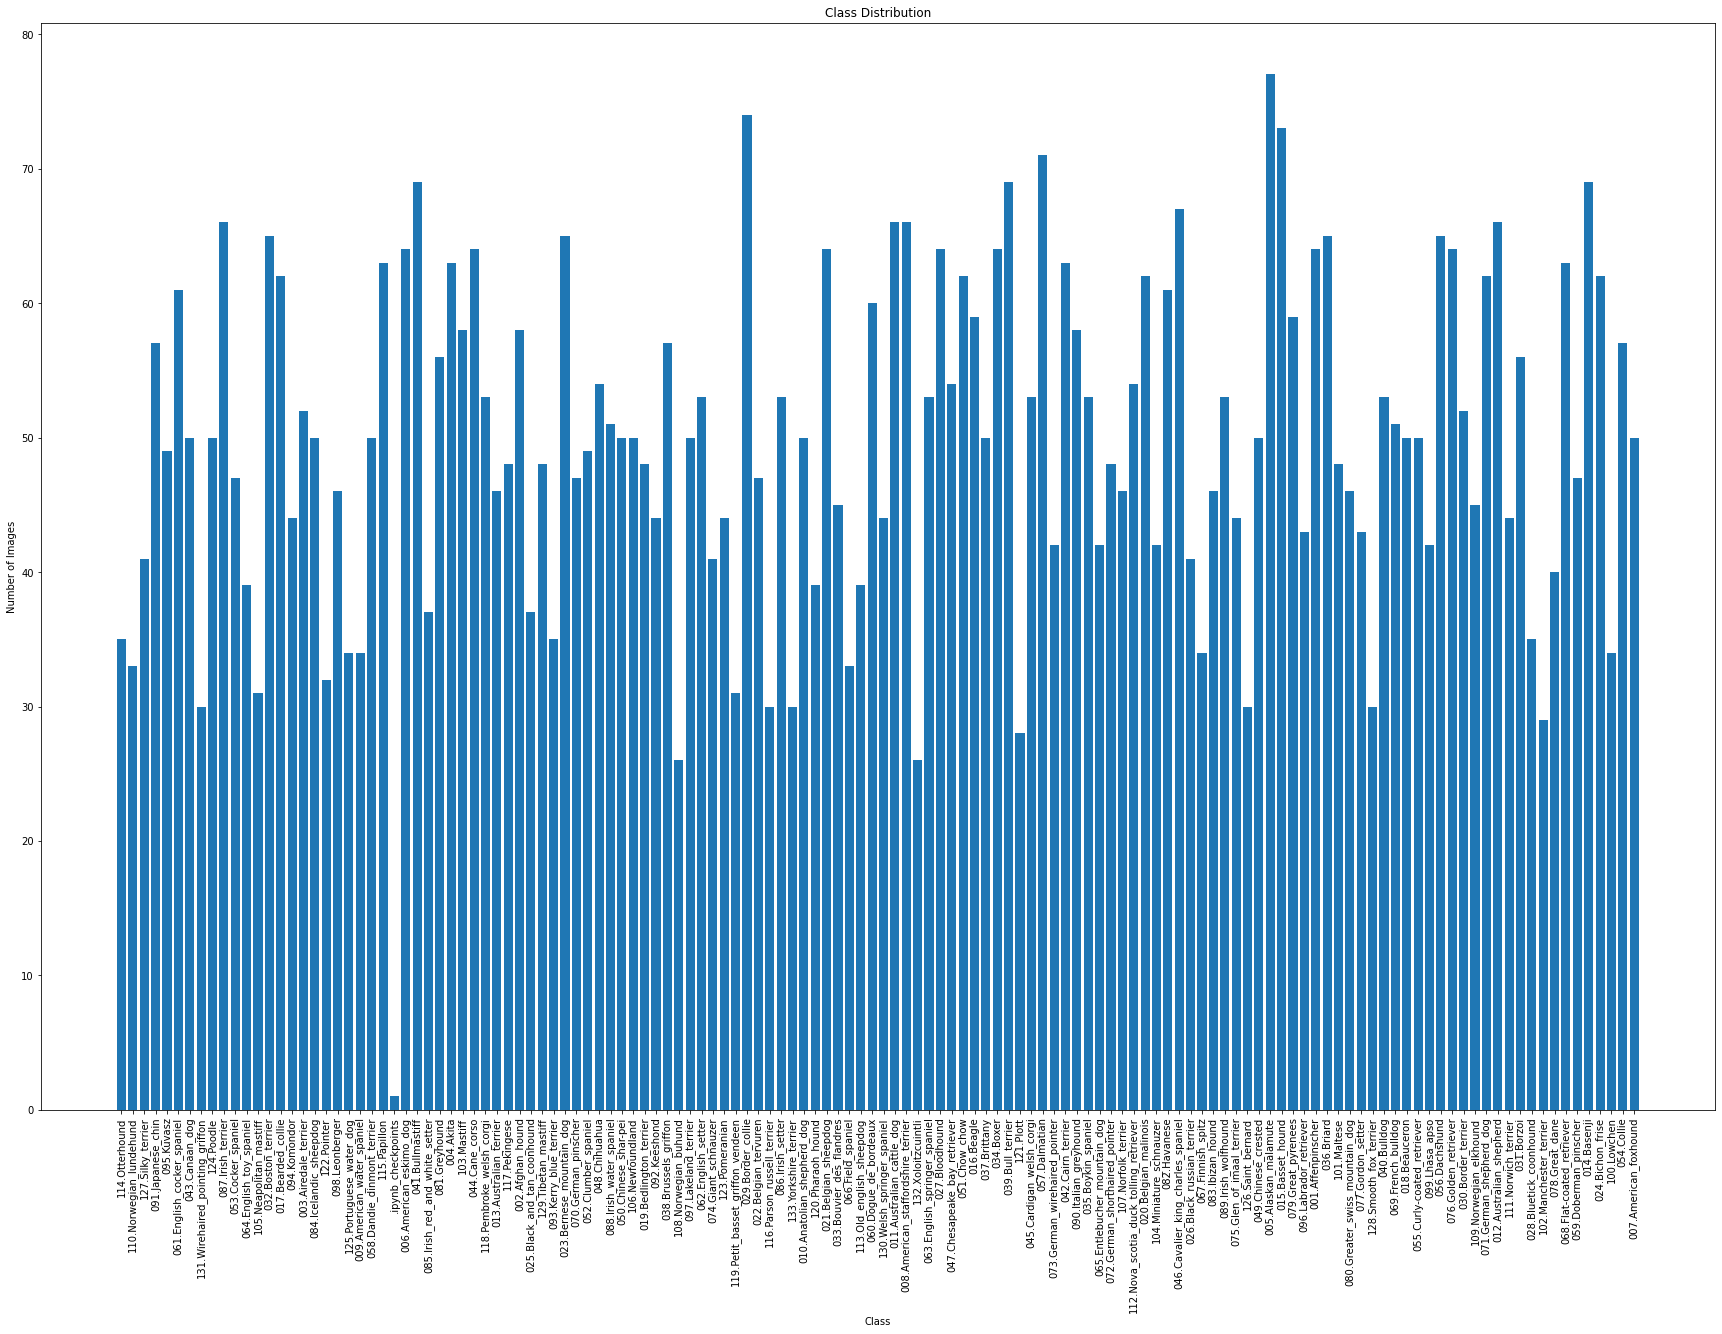

In [28]:
import os
import matplotlib.pyplot as plt

root_dir = 'dogImages/train'
extensions = ['.jpg', '.jpeg', '.png', '.bmp'] # list of image extensions to consider

classes = []
class_counts = []

for dirpath, dirnames, filenames in os.walk(root_dir):
    class_count = 0
    for filename in filenames:
        if any(filename.endswith(ext) for ext in extensions):
            class_count += 1
    if class_count > 0:
        classes.append(os.path.basename(dirpath))
        class_counts.append(class_count)

plt.figure(figsize=(30,20))
plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

In [2]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data

# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

# !unzip dogImages.zip

--2023-01-17 09:12:59--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.194.56
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.194.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  26.8MB/s    in 33s     

2023-01-17 09:13:33 (32.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [3]:
import boto3
import os
import shutil
import zipfile

s3 = boto3.client('s3')

# Set the name of the S3 bucket and the directory you want to upload
bucket_name = 'aws-dog-bucket'

# Upload the zip file to S3
# s3.upload_file('dogImages.zip', bucket_name, 'dogImages.zip')

# Cleanup
# os.remove('dogImages.zip')



In [ ]:


# Set the name of the S3 bucket, the key of the zip file, and the prefix for the unzipped files
zip_key = 'dogImages.zip'
unzip_prefix = 'data'

# Download the zip file from S3
# s3.download_file(bucket_name, zip_key, 'dogImages.zip')

# Unzip the file
# with zipfile.ZipFile('dogImages.zip', 'r') as zip_ref:
    # zip_ref.extractall('dogImages')

# Upload the unzipped files to S3
# for root, dirs, files in os.walk('dogImages'):
    # for filename in files:
    #     local_path = os.path.join(root, filename)
    #     s3_path = unzip_prefix + os.path.relpath(local_path, 'dogImages')
    #     s3.upload_file(local_path, bucket_name, s3_path)

# Cleanup
# os.remove('dogImages.zip')
# shutil.rmtree('dogImages')


In [5]:
dog_classes = [name.split('.') for name in os.listdir("dogImages/train")]
dog_classes = dict(dog_classes)
print(len(dog_classes))
dog_classes

133


{'114': 'Otterhound',
 '110': 'Norwegian_lundehund',
 '127': 'Silky_terrier',
 '091': 'Japanese_chin',
 '095': 'Kuvasz',
 '061': 'English_cocker_spaniel',
 '043': 'Canaan_dog',
 '131': 'Wirehaired_pointing_griffon',
 '124': 'Poodle',
 '087': 'Irish_terrier',
 '053': 'Cocker_spaniel',
 '064': 'English_toy_spaniel',
 '105': 'Neapolitan_mastiff',
 '032': 'Boston_terrier',
 '017': 'Bearded_collie',
 '094': 'Komondor',
 '003': 'Airedale_terrier',
 '084': 'Icelandic_sheepdog',
 '122': 'Pointer',
 '098': 'Leonberger',
 '125': 'Portuguese_water_dog',
 '009': 'American_water_spaniel',
 '058': 'Dandie_dinmont_terrier',
 '115': 'Papillon',
 '006': 'American_eskimo_dog',
 '041': 'Bullmastiff',
 '085': 'Irish_red_and_white_setter',
 '081': 'Greyhound',
 '004': 'Akita',
 '103': 'Mastiff',
 '044': 'Cane_corso',
 '118': 'Pembroke_welsh_corgi',
 '013': 'Australian_terrier',
 '117': 'Pekingese',
 '002': 'Afghan_hound',
 '025': 'Black_and_tan_coonhound',
 '129': 'Tibetan_mastiff',
 '093': 'Kerry_blue_ter

## Preprocessing and Loading the Data
The folder names were extracted to have a list of classes to be used for the training. The label for each image can be defined by its location and filename. 
As RESNET18 will be used for this project, the images need to be resized to 224 x 224 pixels. To avoid overfitting, data augmentation is used to create more variation in the the training dataset. This includes random cropping of image sections and random horizontal flips. Take note of the original image and transformed image below.
 

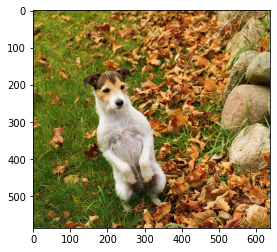

In [34]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

image = Image.open('dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07553.jpg')
plt.imshow(image)
plt.show()

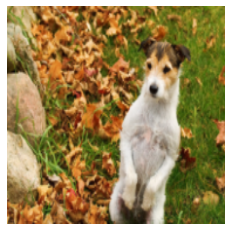

In [38]:
img_transform = transforms.Compose([transforms.Resize((224, 224)), 
                                   transforms.RandomRotation(30),
                                   transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomPerspective(distortion_scale = 0.5, p = 0.5),
                                   transforms.ToTensor(), 
                                   transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                   ])
transformed_image = img_transform(image)

# Convert the tensor back to a numpy array
transformed_image = transformed_image.numpy().transpose(1, 2, 0)

# Undo the normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
transformed_image = std * transformed_image + mean

# Clip values to [0, 1]
transformed_image = np.clip(transformed_image, 0, 1)

plt.imshow(transformed_image)
plt.axis('off')
plt.show()

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

With the need to be conservative in terms of memory and running expenses, the 2 hyperparameters, learning rate and batch size were chosen. 

Learning rate has the potential to decrease the losses caused by a faster gradient descent. A learning rate that is too slow, however, can lead to the possibility of not reaching convergence. 

Varying the batch size, on the other hand, may help with the non-uniform distribution of images for each class, however, may lead to poor generalization. 

The ranges were chosen taking into account that the training time and costs need to be optimized. 

In [39]:
import pandas as pd
import numpy as np

import sagemaker
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.tuner import (
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from sagemaker.debugger import (
    Rule,
    ProfilerRule,
    rule_configs,
    DebuggerHookConfig,
    ProfilerConfig,
    FrameworkProfile,
    CollectionConfig
)

In [46]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
        "lr" : ContinuousParameter(0.01,0.1),
        "batch-size" : CategoricalParameter([32,64,128])
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [47]:
import hpo

#TODO: Create estimators for your HPs

# TODO: Your estimator here

estimator = PyTorch(
    entry_point="hpo.py", 
    role=get_execution_role(),
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)


# TODO: Your HP tuner here
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=3,
    max_parallel_jobs=3,
    objective_type=objective_type,
)


In [49]:
# TODO: Fit your HP Tuner
# TODO: Remember to include your data channels

bucket_name = 'aws-dog-bucket'
prefix = 'datadogImages'

tuner.fit({"training" : "s3://{}/{}".format(bucket_name, prefix) + "/train", 
        "testing": "s3://{}/{}".format(bucket_name, prefix) + "/test",
        "validation" : "s3://{}/{}".format(bucket_name, prefix) + "/valid"}) 

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating hyperparameter tuning job with name: pytorch-training-230204-1327


.......................................................................................................................................................................................................................................................................................................!


In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()


#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-02-04 13:50:35 Starting - Preparing the instances for training
2023-02-04 13:50:35 Downloading - Downloading input data
2023-02-04 13:50:35 Training - Training image download completed. Training in progress.
2023-02-04 13:50:35 Uploading - Uploading generated training model
2023-02-04 13:50:35 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"128"',
 'lr': '0.016290943031922064',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-02-04-13-27-18-609"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-057024489761/pytorch-training-2023-02-04-13-27-18-609/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [54]:
# TODO: Set up debugging and profiling rules and hooks

hyperparameters = {"batch-size": 128, "lr": 0.016290943031922064}

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]
collection_configs=[
    CollectionConfig(name="CrossEntropyLoss_output_0",parameters={
                "include_regex": "CrossEntropyLoss_output_0", 
                "train.save_interval": "100","eval.save_interval": "10"})
]

profiler_config = ProfilerConfig(system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10))
debug_config = DebuggerHookConfig(collection_configs=collection_configs)


In [55]:
# TODO: Create and fit an estimator

bucket_name = 'aws-dog-bucket'
prefix = 'datadogImages'

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-dogImages-pytorch",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    rules=rules,
    debugger_hook_config=debug_config,
    profiler_config=profiler_config
)

estimator.fit({
        "training" : "s3://{}/{}".format(bucket_name, prefix) + "/train" , 
        "testing" : "s3://{}/{}".format(bucket_name, prefix) + "/test",
        "validation" : "s3://{}/{}".format(bucket_name, prefix) + "/valid"})

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311


2023-02-04 14:09:59 Starting - Starting the training job...
2023-02-04 14:10:28 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
LossNotDecreasing: InProgress
ProfilerReport: InProgress
......
2023-02-04 14:11:29 Downloading - Downloading input data.........
2023-02-04 14:12:49 Training - Downloading the training image...
2023-02-04 14:13:30 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-02-04 14:13:17,081 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-02-04 14:13:17,084 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-02-04 14:13:17,092 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-02-04 14:13:17,096 sagemaker_pytorch_container.training INFO     Invoking user training s

In [64]:
# TODO: Plot a debugging output.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import boto3
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

Training jobname: smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311
Region: us-east-1
[2023-02-04 15:04:30.649 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:32 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-057024489761/smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/debug-output
[2023-02-04 15:04:31.835 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:32 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-02-04 15:04:32.857 pytorch-1-6-cpu-py36--ml-t3-medium-370ee60fbc7a856e8f67ac271515:32 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight']
1
17


In [65]:
def plot_tensor(trial, tensor_name):
    

    train_steps, train_vals = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    eval_steps, eval_vals = get_data(trial, tensor_name, mode=ModeKeys.EVAL)

    fig = plt.figure(figsize=(20, 8))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAINING)")
    par.set_xlabel("Steps (EVALUATION)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(train_steps, train_vals, label=tensor_name)
    (p2,) = par.plot(eval_steps, eval_vals, label="val_" + tensor_name)
    
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

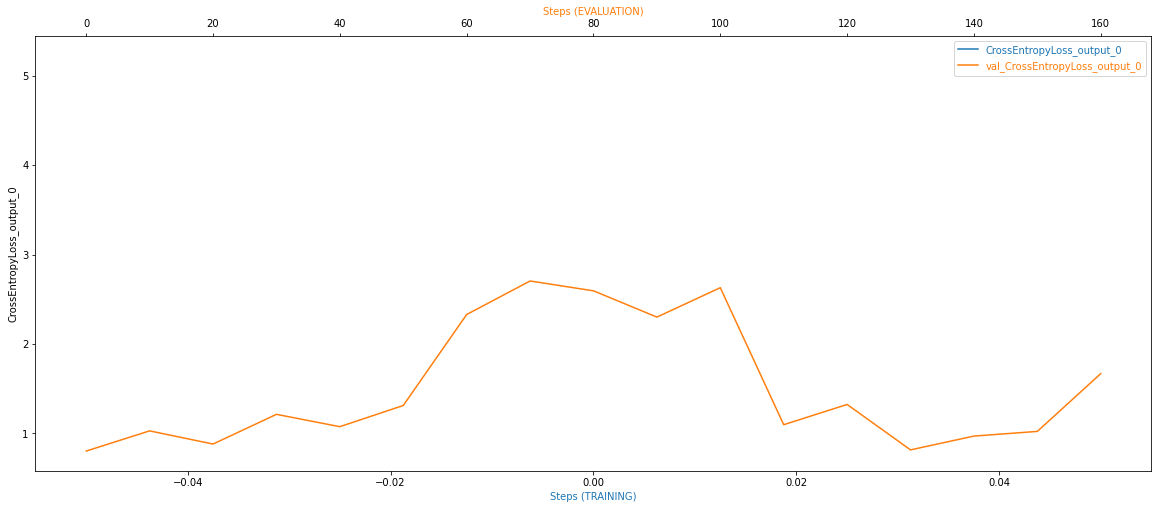

In [66]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [67]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2023-02-04 14:51:25     375502 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-02-04 14:51:25     223438 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-02-04 14:51:20        192 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-02-04 14:51:20        200 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-02-04 14:51:20       1978 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-02-04 14:51:20        127 smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-02-04 14:51:20        199 smdebugger-dogImages-py

In [68]:
import os
import IPython
import shutil

profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

shutil.make_archive("./profiler_repot", "zip", "ProfilerReport")


'/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/profiler_repot.zip'

## Model Deploying

In [69]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import boto3
import sagemaker
from sagemaker.pytorch import PyTorchModel
from sagemaker import get_execution_role, Session
from sagemaker.serializers import JSONSerializer, IdentitySerializer
from sagemaker.deserializers import JSONDeserializer
import io
from PIL import Image
import torchvision.transforms as transforms

In [74]:
model_location = estimator.model_data
model_location

's3://sagemaker-us-east-1-057024489761/smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/output/model.tar.gz'

In [70]:
model_location = 's3://sagemaker-us-east-1-057024489761/smdebugger-dogImages-pytorch-2023-02-04-14-09-59-311/output/model.tar.gz'

pytorch_model = PyTorchModel(model_data=model_location, role=get_execution_role(), entry_point='inference.py', py_version='py36',
                             framework_version='1.8')

predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating model with name: pytorch-inference-2023-02-04-15-09-45-177
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-02-04-15-09-45-825


------!

In [77]:
predictor.endpoint

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'pytorch-inference-2023-02-04-15-09-45-825'

In [78]:
def predict (img_path):
    image = Image.open(img_path)
    
    print('transforming input')
    img_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),])
    
    print('loading image to model')
    t_img = img_transform(image).unsqueeze(0)
    t_img = t_img.to('cpu')
    
    print('getting prediction')
    response = predictor.predict(t_img)
    return response

In [79]:
r1 = predict("dogImages/test/006.American_eskimo_dog/American_eskimo_dog_00454.jpg" )

transforming input
loading image to model
getting prediction


ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-02-04-15-09-45-825 in account 057024489761 for more information.

In [80]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2023-02-04-15-09-45-825
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2023-02-04-15-09-45-825
